In [1]:
import os
import os.path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
foramtter = matplotlib.dates.DateFormatter('%m-%d')

def show(file):
    # fetch and clean the data
    data = pd.read_csv(os.path.join('data', file), index_col=0, dtype=np.float32, parse_dates=True)
    data.fillna(method='ffill', inplace=True)
    
    # plot lines
    plt.figure(figsize=(6.4, 4.8))
    for (label, content), marker in zip(data.items(), 'o^sxD*dv'): # '.,ov^<>1234sp*hH+xDd|_'
        plt.plot(data.index, content, '{}-'.format(marker), label=label)
        
    # change the look
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1, 1))
    title = file[:file.index('.')]
    plt.title(title)
    plt.gca().get_xaxis().set_major_formatter(foramtter)
    plt.xticks(data.index, rotation=30)
    plt.ylabel('weight (lbs)')
    
    # save and show the figure
    plt.savefig(os.path.join('figures', title), bbox_inches='tight', pad_inches=0.3)
    plt.show()
    return data

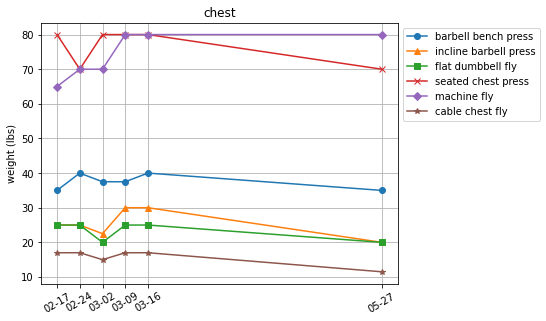

,barbell bench press,incline barbell press,flat dumbbell fly,seated chest press,machine fly,cable chest fly
2020-02-17,35.0,25.0,25.0,80.0,65.0,17.0
2020-02-24,40.0,25.0,25.0,70.0,70.0,17.0
2020-03-02,37.5,22.5,20.0,80.0,70.0,15.0
2020-03-09,37.5,30.0,25.0,80.0,80.0,17.0
2020-03-16,40.0,30.0,25.0,80.0,80.0,17.0
2020-05-27,35.0,20.0,20.0,70.0,80.0,11.5


In [3]:
show('chest.csv')

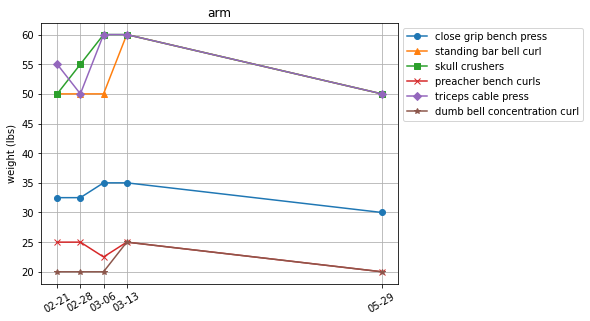

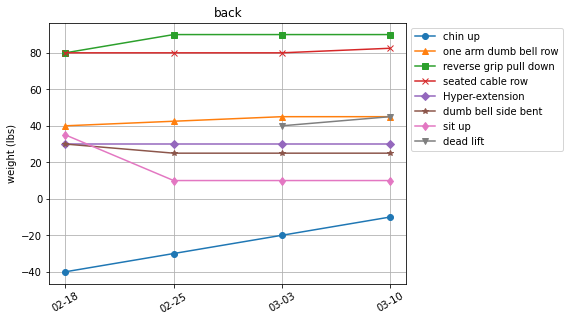

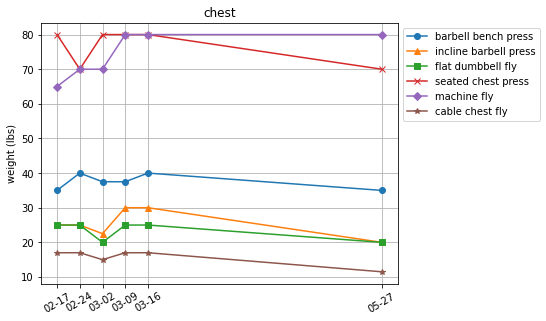

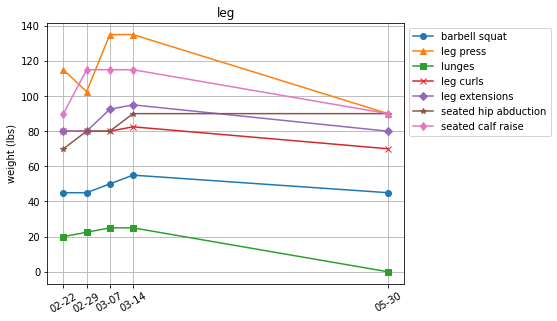

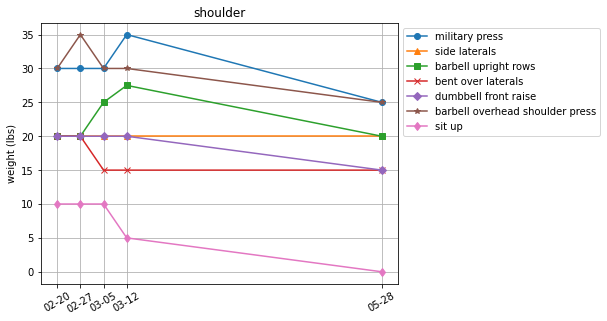

In [4]:
for file in sorted(os.listdir('data')):
    show(file)